In [25]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('http://indexes.nikkei.co.jp/nkave/historical/nikkei_stock_average_daily_jp.csv')
df.columns = ['date', 'close', 'open', 'high', 'low']
df = df.dropna()

In [83]:
prices = df['close']

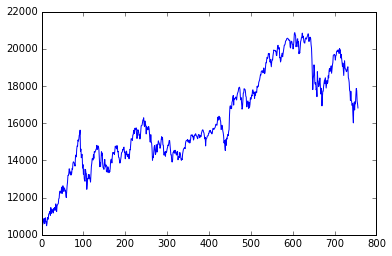

In [84]:
plt.plot(prices)
prices = np.array(prices)

In [85]:
def noise(d):
    d_noise = np.zeros(len(d))
    for i in range(len(d)):
        d_noise[i] = d[i] + np.random.normal(0, 1000)
    return d_noise

In [86]:
prices_noise = noise(prices)

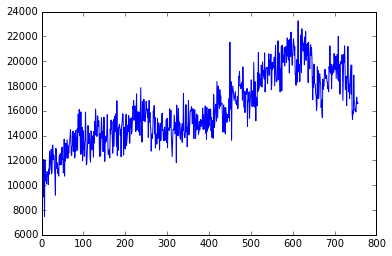

In [87]:
plt.plot(prices_noise)

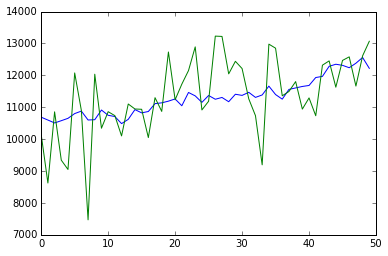

In [88]:
p1 = plt.plot(prices[:50])
p2 = plt.plot(prices_noise[:50])
plt.legend()

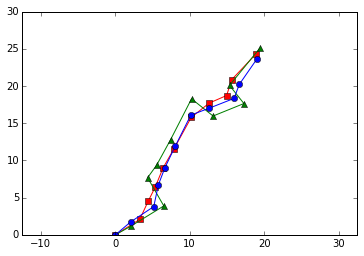

In [73]:
import numpy as np
import matplotlib.pyplot as plt

def lkf(T, Y, U, mu0, Sigma0, A, B, C, Q, R):
    '''Linear Kalman Filter
    
    - 状態方程式
        x = A * x_ + B * u + w, w ~ N(0,Q)
    - 観測方程式
        y = C * x + v, v ~ N(0,R)
    
    Parameters
    ==========
    - T : ステップ数
    - Y : 観測列
    - U : 入力列
    - mu0 : 初期状態推定値
    - Sigma0 : 初期誤差共分散行列
    - A, B, C, Q, R : カルマンフィルタの係数 
    
    Returns
    =======
    - M : 状態推定値列
    '''

    mu = mu0 # 初期状態推定値
    Sigma = Sigma0 # 初期誤差共分散行列

    M = [mu] # 状態推定値列

    for i in range(T):
        # 推定
        mu_ = A * mu + B * U[i]
        Sigma_ = Q + A * Sigma * A.T

        # 更新
        yi = Y[i+1] - C * mu_
        S = C * Sigma_ * C.T + R
        K = Sigma_ * C.T * S.I
        mu = mu_ + K * yi
        Sigma = Sigma_ - K * C * Sigma_
        M.append(mu)

    return M

def main():
    # 状態方程式
    # x = A * x_ + B * u + w, w ~ N(0,Q)
    A = np.mat([[1,0], [0,1]])
    B = np.mat([[1,0], [0,1]])
    Q = np.mat([[1,0], [0,1]])
    # 観測方程式
    # y = C * x + v, v ~ N(0,R)
    C = np.mat([[1,0], [0,1]])
    R = np.mat([[2,0], [0,2]])

    # 観測のテストデータの生成
    T = 10 # 観測数
    x = np.mat([[0],[0]]) # 初期位置
    X = [x] # 状態列
    Y = [x] # 観測列
    u = np.mat([[2],[2]]) # 入力（一定）
    U = [u] # 入力列
    for i in range(T):
        x = A * x + B * u + np.random.multivariate_normal([0, 0], Q, 1).T
        X.append(x)
        y = C * x + np.random.multivariate_normal([0, 0], R, 1).T
        Y.append(y)
        U.append(u)

    # LKF
    mu0 = np.mat([[0],[0]]) # 初期状態推定値
    Sigma0 = np.mat([[0,0],[0,0]]) # 初期誤差共分散行列
    M = lkf(T, Y, U, mu0, Sigma0, A, B, C, Q, R)

    # 描画
    a, b = np.array(np.concatenate(X,axis=1))
    plt.plot(a,b,'rs-')
    a, b = np.array(np.concatenate(Y,axis=1))
    plt.plot(a,b,'g^-')
    a, b = np.array(np.concatenate(M,axis=1))
    plt.plot(a,b,'bo-')
    plt.axis('equal')
    plt.show()

if __name__ == '__main__':
    main()

In [92]:
def update(P, C, R, x_hat, obs, I):
    """
    P: 誤差共分散行列
    C: 観測系数行列
    R: 観測ノイズ分散行列
    """
    #カルマンゲイン
    G = P * C / (C.T * P * C + R)
    x_hat = x_hat + G * (obs - C.T * x_hat)
    P = (I -  G * C.T) * P
    return x_hat, P

y = prices_noise
A = np.mat([1])
P = np.mat([[1, 0], [0, 1]])
R = np.mat([1])
I = np.identity(2)
x_hat = np.mat([[0], [0]])

X = np.array([])
for i in range(365):
    C = np.mat([[x[i]], [1]])
    obs = np.mat([y[i]])
    x_hat, P = update(P, C, R, x_hat, obs, I)
    X = np.append(X, x_hat)

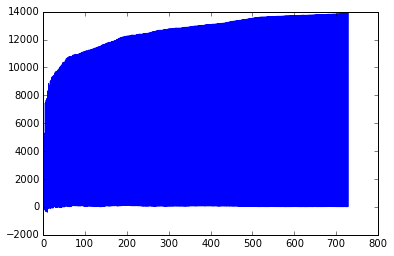

In [93]:
plt.plot(X)

In [94]:
X

array([ -5.55297127e+02,   5.04028217e+03,   7.69025611e+02,
         5.28124329e+03,  -2.23994068e+02,   7.45745987e+03,
        -3.18070807e+02,   7.64061062e+03,  -3.41241014e+02,
         7.77765086e+03,  -3.74806913e+02,   8.31882959e+03,
        -1.31401422e+02,   8.83848941e+03,  -9.12342082e+01,
         8.67913637e+03,  -8.21578244e+01,   9.01605646e+03,
        -1.20965779e+02,   9.09665359e+03,  -1.28845252e+01,
         9.30417637e+03,  -8.13835074e+01,   9.36727811e+03,
        -6.83819556e+01,   9.43121167e+03,   2.48254144e+01,
         9.57947747e+03,   1.22843331e+00,   9.66162987e+03,
        -3.85011164e+01,   9.71570345e+03,  -4.22006789e+01,
         9.72532247e+03,  -3.43314702e+01,   9.81336200e+03,
         2.37769877e+00,   9.88776009e+03,  -3.19757523e+01,
         1.00072269e+04,  -5.55400637e+01,   1.00404198e+04,
        -4.45053623e+01,   1.01218154e+04,  -5.09601375e+01,
         1.01999214e+04,   8.55179095e-01,   1.03393826e+04,
         4.43101186e+00,